# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# Upload Data and Removed Unnecessary Columns
user_data = pd.read_csv('takehome_users.csv',encoding='latin-1',parse_dates=True)
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
user_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [6]:
# Convert to datetime and set index to time stamp
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement = engagement.set_index('time_stamp')
engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [7]:
# Group by user, date by week, and number of visits per week
grouped_data = engagement.groupby('user_id').resample('1W').sum()
grouped_data = grouped_data[grouped_data['user_id'].isnull()==False].drop('user_id',axis=1)


In [8]:
# Create Column Containing Adopted if Weekly Visits Exceed 3
grouped_data['adopted'] = grouped_data['visited']>=3
grouped_data.head()

visited  adopted
user_id time_stamp                  
1       2014-04-27        1    False
2       2013-11-17        1    False
        2013-11-24        0    False
        2013-12-01        1    False
        2013-12-08        0    False

In [9]:
# Show active users only 
active_only = grouped_data.groupby(level=0).apply(np.sum)
active_only = active_only[active_only!=0]
active_only = active_only.dropna()
active_only.columns = ['Number of Visits','Number of Active Weeks']
active_only = active_only.astype(int)
active_only.head()

,Number of Visits,Number of Active Weeks
user_id,,
2,14,1
10,284,52
20,7,1
33,18,1
42,342,68


In [10]:
# Merge info with active users
active_all = active_only.merge(user_data, left_index=True,right_on='object_id')
active_all['Active']=1
active_all.head()

,Number of Visits,Number of Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
1,14,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
9,284,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
19,7,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,1
32,18,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1
41,342,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1


In [11]:
# Create DataFrame showing all users grouped by object id
user_data['Active']=int(0)
user_data.iloc[list(active_all.index),10]=1
model_data = user_data.set_index('object_id').sort_index()
model_data = model_data.drop([ 'name', 'email','last_session_creation_time',],axis=1)
creation_time = model_data.pop('creation_time')
model_data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [12]:
# Convert model_data into numbers
model_data.invited_by_user_id = model_data.invited_by_user_id.apply(lambda x: 1 if x != 0 else 0)
model_data=pd.get_dummies(model_data,columns=['creation_source'])
model_data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,1,0,11,1,0,1,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0
3,0,0,94,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,193,1,0,1,0,0,0,0


In [13]:
model_data.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'Active', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [14]:
# Rearrange Column Order
model_data=model_data[['Active', 'org_id','opted_in_to_mailing_list', 'enabled_for_marketing_drip',\
                       'invited_by_user_id', 'creation_source_GUEST_INVITE',\
                       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',\
                       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]

In [15]:
model_data.head()

,Active,org_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,0,11,1,0,1,1,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0
3,0,94,0,0,1,0,1,0,0,0
4,0,1,0,0,1,1,0,0,0,0
5,0,193,0,0,1,1,0,0,0,0


# Machine Learning

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz

In [17]:
x_variables = model_data.drop('Active',axis=1)
y_variable = model_data.Active


In [18]:
x_variables.columns

Index(['org_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [19]:
# Splitting Data
X = np.array(x_variables)
y = np.array(y_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
# KNN
knn = KNeighborsClassifier(leaf_size=10)
knn.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=knn.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.88      0.98      0.93      3483
        yes       0.19      0.03      0.05       477

avg / total       0.80      0.87      0.82      3960



In [21]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True) 
rfc.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=rfc.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.88      0.94      0.91      3483
        yes       0.15      0.07      0.10       477

avg / total       0.79      0.84      0.81      3960



In [22]:
# Gradient Boosting
gb = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
gb.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=gb.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.88      1.00      0.93      3483
        yes       0.19      0.01      0.01       477

avg / total       0.80      0.88      0.82      3960



In [28]:
importances = pd.DataFrame(list(zip(x_variables.columns, gb.feature_importances_)), columns = ['Features', 'Importance'])
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Features,Importance
0,org_id,0.600039
4,creation_source_GUEST_INVITE,0.082593
1,opted_in_to_mailing_list,0.080867
5,creation_source_ORG_INVITE,0.062037
2,enabled_for_marketing_drip,0.060732
7,creation_source_SIGNUP,0.056314
6,creation_source_PERSONAL_PROJECTS,0.034375
8,creation_source_SIGNUP_GOOGLE_AUTH,0.023044
3,invited_by_user_id,0.000000


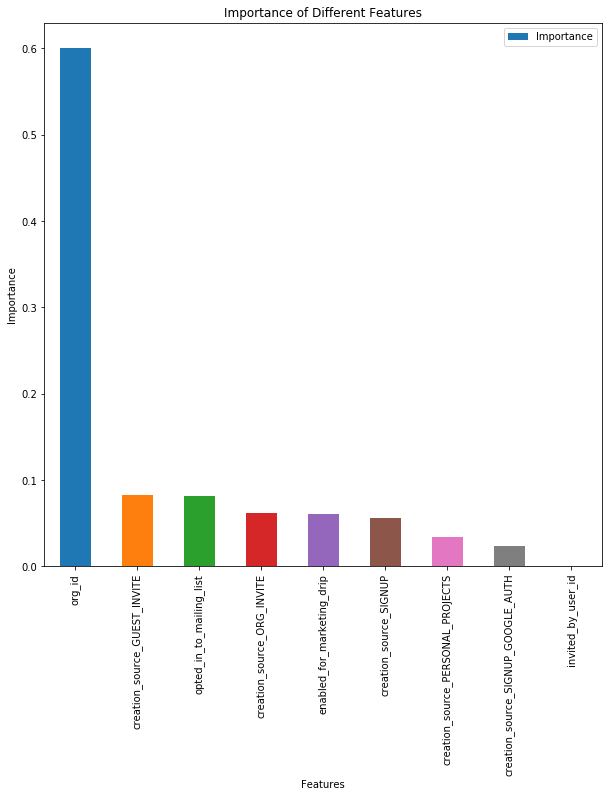

In [29]:
ax = importances.plot.bar(x='Features', y= 'Importance', stacked=True,figsize=(10, 10))
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Importance of Different Features');